In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Исходный квадрат
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]], dtype=np.float32)

# Добавляем третью координату для однородных координат
square_ = np.column_stack([square, np.ones(len(square))])

In [5]:
def plot_transformation(original, transformed, title):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(original[:, 0], original[:, 1], 'bo-', label='Исходный')
    plt.fill(original[:, 0], original[:, 1], 'blue', alpha=0.3)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.title('Исходная фигура')
    
    plt.subplot(1, 2, 2)
    plt.plot(transformed[:, 0], transformed[:, 1], 'ro-', label='Преобразованная')
    plt.fill(transformed[:, 0], transformed[:, 1], 'red', alpha=0.3)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    
    plt.tight_layout()
    plt.show()


1. Сдвиг

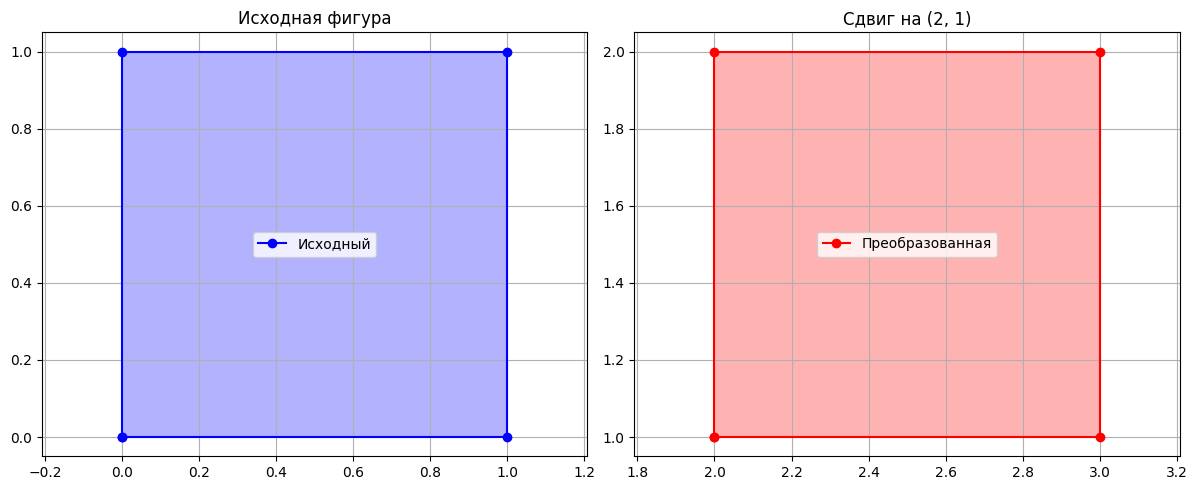

In [6]:
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

# Сдвиг на (2, 1)
M_trans = translation_matrix(2, 1)
translated_square = (M_trans @ square_.T).T[:, :2]

plot_transformation(square, translated_square, 'Сдвиг на (2, 1)')

Поворот

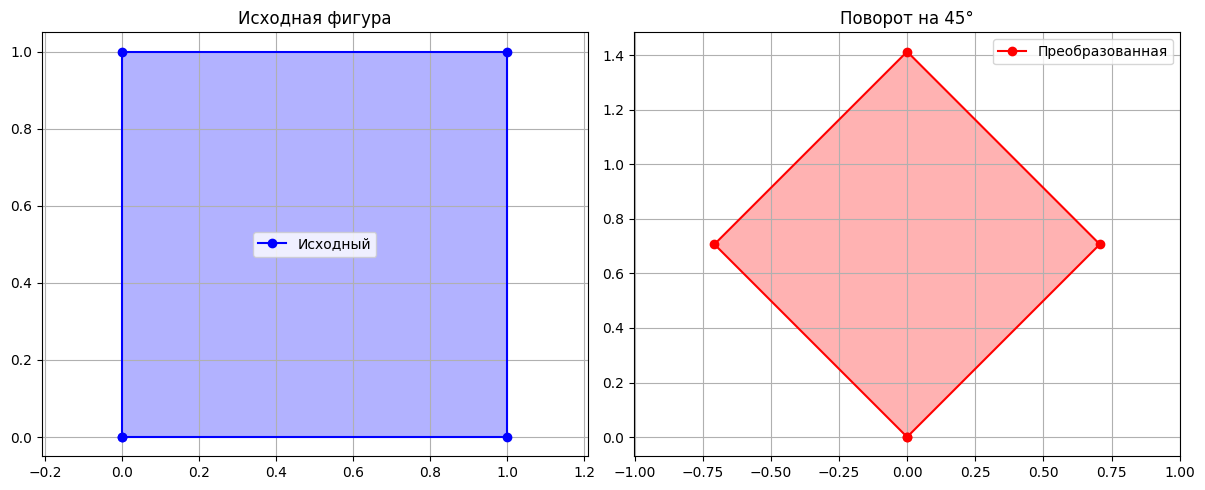

In [7]:
def rotation_matrix(angle_deg):
    angle_rad = np.radians(angle_deg)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    return np.array([[cos_a, -sin_a, 0],
                     [sin_a,  cos_a, 0],
                     [0,      0,     1]])

# Поворот на 45 градусов вокруг начала координат
M_rot = rotation_matrix(45)
rotated_square = (M_rot @ square_.T).T[:, :2]

plot_transformation(square, rotated_square, 'Поворот на 45°')

Масштабирование

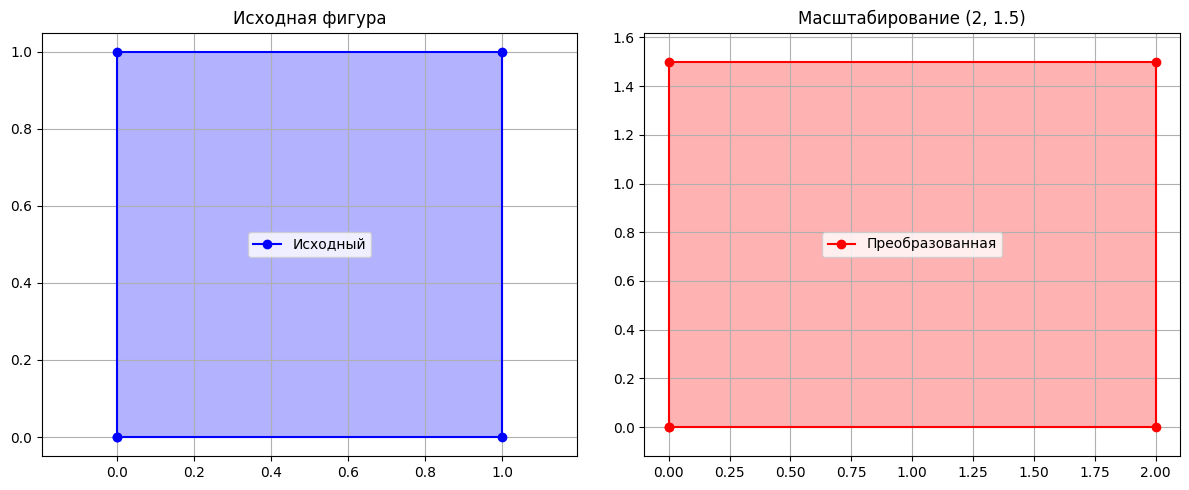

In [8]:
def scaling_matrix(sx, sy):
    return np.array([[sx, 0,  0],
                     [0,  sy, 0],
                     [0,  0,  1]])

# Масштабирование в 2 раза по X и 1.5 по Y
M_scale = scaling_matrix(2, 1.5)
scaled_square = (M_scale @ square_.T).T[:, :2]

plot_transformation(square, scaled_square, 'Масштабирование (2, 1.5)')

Комбинированное преобразование

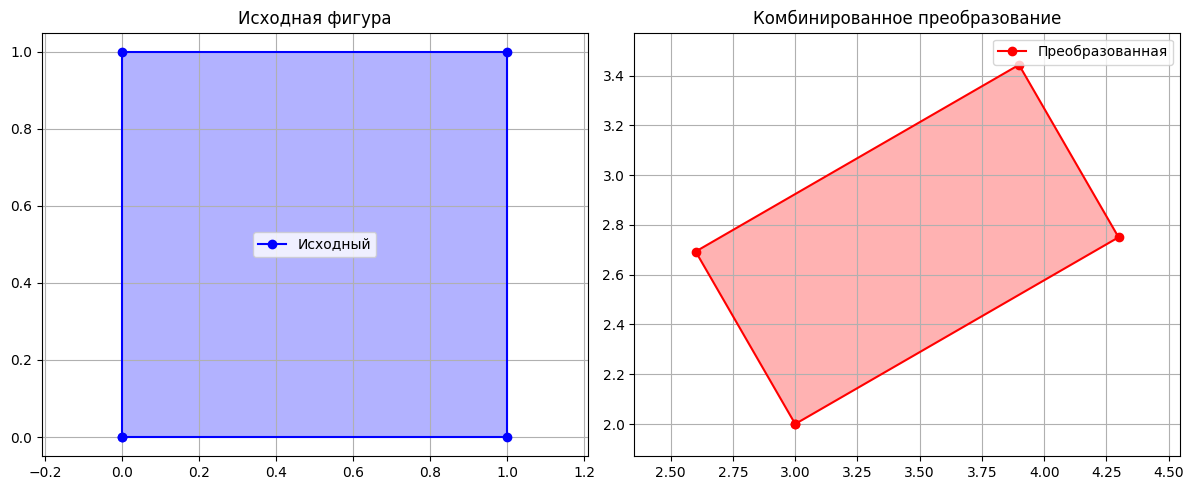

In [9]:
# Поворот + масштабирование + сдвиг
M_combined = translation_matrix(3, 2) @ rotation_matrix(30) @ scaling_matrix(1.5, 0.8)
combined_square = (M_combined @ square_.T).T[:, :2]

plot_transformation(square, combined_square, 'Комбинированное преобразование')

Python-библиотеки для аффинных преобразований

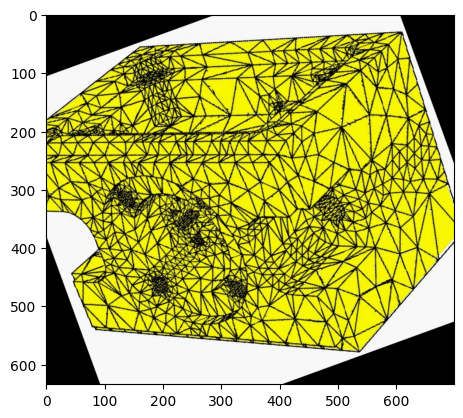

In [12]:
import cv2
import numpy as np

# Создание матрицы преобразования
M = np.float32([[1.5, 0.2, 100],
                [0.1, 1.2, 50]])

# Применение к изображению
img = cv2.imread('image.jpg')
rows, cols = img.shape[:2]

transformed_img = cv2.warpAffine(img, M, (cols, rows))

# Поворот с помощью getRotationMatrix2D
center = (cols // 2, rows // 2)
M_rotation = cv2.getRotationMatrix2D(center, 20, 1.0)
rotated_img = cv2.warpAffine(img, M_rotation, (cols, rows))
plt.imshow(rotated_img)